# Overview

In order to dataset code to be decoupled from the model training code for better readability and modularity. PyTorch provides two data primitives:

* torch.utils.data.DataLoader
* torch.utils.data.Dataset

These two that allow you to use pre-loaded datasets as well as our own data. **Dataset stores the samples and their corresponding labels**, and **DataLoader wraps an iterable around the Dataset to enable easy access to the samples**. And there are different types of PyTorch Datasets like:

* Image Datasets(torchvision)
* Text Datasets(torchtext)
* Audio Datasets(torchaudio)

# Loading a Dataset

Let's use DataLoader to load the Fashion-MNIST dataset from `TorchVision`. Fashion-MNIST is a dataset of Zalando's article image consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28x28 grayscale image and an associated label from one of 10 classes.

We load the Dataset with the following parameters:
* `root` is the path where the train/test data is stored
* `train` specifies training ot test dataset
* `download=True` downloads the data from the internet if it's not avaliable at root
* `transform` and `target_transform` specify the feature and label transformations

In [1]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data=datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data=datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:02<00:00, 12458739.46it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 195824.37it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3670328.18it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10456308.47it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



# Iterating and Visualizing the Dataset

We can index `Datasets` manually like a list: `training_data[index]`. We use `matplotlib` to visualize some samples in our training data.

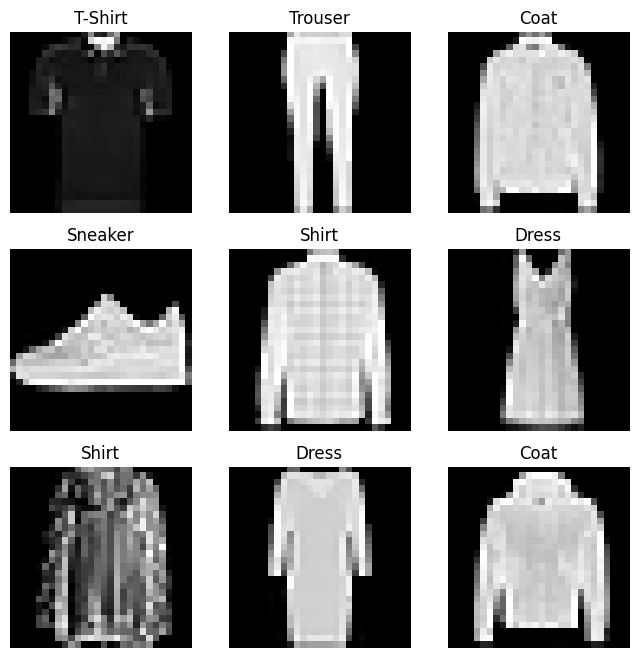

In [2]:
import torch
import matplotlib.pyplot as plt

labels_map={
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure=plt.figure(figsize=(8,8))
cols, rows=3,3
for i in range(1, cols*rows+1):
    sample_idx=torch.randint(len(training_data), size=(1,)).item()
    img, label=training_data[sample_idx]
    figure.add_subplot(rows, cols,i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Preparing the data for training with DataLoaders

The `Dataset` retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and use Python's `multiprocessing` to speed up data retrieval. `DataLoader` is what you need.

In [3]:
from torch.utils.data import DataLoader

train_dataloader=DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader=DataLoader(test_data, batch_size=64, shuffle=True)

## Iterate through the DataLoader

We have load the dataset inot the DataLoader and can iterate through the datasets as needed. Each iteration below returns a batch of `train_features` and `train_labels`(containing `batch_size=64` features and labels respectively). Because we specified `shuffle=True`, after we iterate over all batches the data is shuffled.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


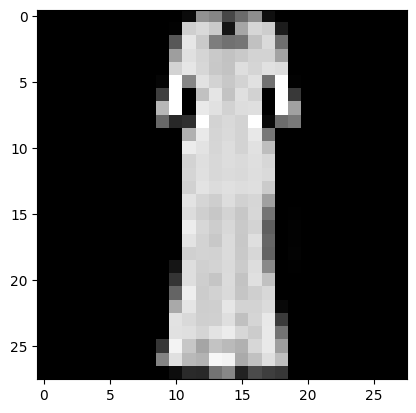

Label: 3


In [4]:
train_features, train_labels= next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img=train_features[0].squeeze()
label=train_labels[0]

plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Data Loading Order and Sampler

For iterable-style datasets, data loading order is entirely controlled by the user-define iterable. This allows easier implementations of chunk-reading and dynamic batch size(e.g., by yielding a batched sample at each time).